In [4]:
!pip install -qU langchain langsmith langchain-core langchain-community langchain-experimental langchain-openai langchain-groq pypdf langchain-text-splitters langchain-chroma faiss-cpu sentence_transformers google-search-results wikipedia duckduckgo-search arxiv langgraph

# Load Envs


In [5]:
import os
from google.colab import userdata
os.environ['GROQ_API_KEY'] = userdata.get('GROQ_API_KEY')
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
# os.environ['HUGGINGFACEHUB_API_TOKEN'] = userdata.get('HUGGINGFACEHUB_API_TOKEN')
os.environ['LANGSMITH_API_KEY'] = userdata.get('LANGSMITH_API_KEY')
# os.environ['SERPAPI_API_KEY'] = userdata.get('SERPAPI_API_KEY')

# Set Up Langsmith

In [6]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGSMITH_API_KEY')
os.environ["LANGCHAIN_PROJECT"] = "langgraph_learning"

# MessageState

The MessagesState is exactly the same

```
class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
```
as
```
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]
```

This is provided directly by langgraph, we can use either

[Github](https://github.com/langchain-ai/langgraph/blob/main/libs/langgraph/langgraph/graph/message.py)

In [68]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI()

In [71]:
from langgraph.graph import MessagesState

def general_func(state: MessagesState):
  print("------------ General Func ----------")
  print(state)

  query = state['messages'][0]
  print(query)

  result = llm.invoke(query)
  print(result)

  return {"messages" : [result]}

Testing

In [72]:
user_input = {"messages" : ["What is the capital of France?"]}
result = general_func(user_input)

------------ General Func ----------
{'messages': ['What is the capital of France?']}
What is the capital of France?
content='The capital of France is Paris.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 14, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-d5cfa6c1-43e6-49d5-8518-545b7171b6d8-0' usage_metadata={'input_tokens': 14, 'output_tokens': 8, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [73]:
result

{'messages': [AIMessage(content='The capital of France is Paris.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 14, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-d5cfa6c1-43e6-49d5-8518-545b7171b6d8-0', usage_metadata={'input_tokens': 14, 'output_tokens': 8, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [81]:
result['messages'][0].content

'The capital of France is Paris.'

In [82]:
user_input = {"messages" : ["What are LLMs?"]}
result = general_func(user_input)

------------ General Func ----------
{'messages': ['What are LLMs?']}
What are LLMs?
content='LLMs stand for Master of Laws, which is a postgraduate academic degree typically pursued by individuals who already hold a law degree and wish to specialize in a particular area of law. LLM programs are offered by universities around the world and provide advanced legal education and training in specialized areas such as international law, human rights law, environmental law, and more.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 13, 'total_tokens': 85, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-16b6bf24-a725-4831-9fc1-bffd5f0b55d4-0' usage_metadata={'i

In [83]:
user_input = {"messages" : ["What are large language models?"]}
result = general_func(user_input)

------------ General Func ----------
{'messages': ['What are large language models?']}
What are large language models?
content="Large language models are AI systems that are trained on vast amounts of data to understand and generate human language. These models are typically based on deep learning techniques and use neural networks to process and generate text. They are capable of understanding context, generating coherent responses, and performing a wide range of language-related tasks such as translation, summarization, and text generation. Some popular examples of large language models include OpenAI's GPT series and Google's BERT." additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 13, 'total_tokens': 105, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name'

In [84]:
result['messages'][0].content

"Large language models are AI systems that are trained on vast amounts of data to understand and generate human language. These models are typically based on deep learning techniques and use neural networks to process and generate text. They are capable of understanding context, generating coherent responses, and performing a wide range of language-related tasks such as translation, summarization, and text generation. Some popular examples of large language models include OpenAI's GPT series and Google's BERT."

# LLM

In [11]:
from langchain_groq import ChatGroq
model = ChatGroq()

In [12]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI()

# Tool Calling - Function Calling

Understand why we need to bind_tools.

### [Tool calling](https://python.langchain.com/v0.1/docs/modules/model_io/chat/function_calling/)

Tool calling allows a model to respond to a given prompt by generating output that matches a user-defined schema. While the name implies that the model is performing some action, this is actually not the case! The model is coming up with the arguments to a tool, and **actually running the tool (or not) is up to the user**

---

> The model is coming up with the arguments to a tool, and **actually running the tool (or not) is up to the user**.

---


For a model to be able to invoke tools, you need to pass tool schemas to it when making a chat request.

LangChain ChatModels supporting tool calling features implement a `.bind_tools` method, which receives a list of LangChain tool objects, Pydantic classes, or JSON Schemas and binds them to the chat model in the provider-specific expected format.

Subsequent invocations of the bound chat model will include tool schemas in every call to the model API.



## Defining Tool Schema

### Prebuilt Tool

In [7]:
from langchain_community.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun()

In [8]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

### Custom Tool

In [9]:
from langchain_core.tools import tool

In [15]:
@tool
def random_func(user_input: str) -> str:
  """
  Surprises user with a random fact.

  Args:
    user_input: string.

  Returns:
    A random fact: String.
  """
  random_prompt = "Surprise the user with something random about {user_input}".format(user_input=user_input)
  return model.predict(random_prompt)


Testing

In [19]:
print(random_func("cats")) # calling directly

Did you know that cats have a unique "purring" sound that is produced by vibrations of the laryngeal muscles and the diaphragm? This soothing sound is thought to have a calming effect on both cats and their humans. Cats can also purr when they are content, but some cats will purr when they are in pain or stressed, possibly as a way to self-soothe. It's just one of the many fascinating things about our feline friends!


In [20]:
print(random_func.invoke("cats")) # but since this is a tool, we can also use invoke

Did you know that cats have a unique feature called a "jaunting muscle" that allows them to jump up to six times their own height? This muscle, also known as the "jumping muscle," is located in the cat's hind legs and allows them to propel themselves into the air with incredible force. It's just one of the many things that makes cats such amazing and agile creatures! Is there anything else you would like to know about cats or any other topic? I'm here to help!


## Bind the tools

In [33]:
tools = [search, wikipedia, random_func]

In [34]:
llm_with_tools = llm.bind_tools(tools)

In [35]:
llm_with_tools.invoke("What is the capital of France?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0SRsAjTmP3Pp5gRO0HALa6w4', 'function': {'arguments': '{"query":"Capital of France"}', 'name': 'wikipedia'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 188, 'total_tokens': 204, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-49468ca8-a999-42e3-84d8-2cfda8b31f95-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Capital of France'}, 'id': 'call_0SRsAjTmP3Pp5gRO0HALa6w4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 188, 'output_tokens': 16, 'total_tokens': 204, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reas

In [36]:
llm_with_tools.invoke("Hi, How are you today?")

AIMessage(content="I'm here and ready to assist you! How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 188, 'total_tokens': 206, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-1caca6c9-3782-42a1-aff8-af11ea00a7dc-0', usage_metadata={'input_tokens': 188, 'output_tokens': 18, 'total_tokens': 206, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

# Observation:

So if we carefully observe we see:

  1. When a tool is getting picked to answer the query.
    ```
    content='' # this is empty
    additional_kwargs = {} # this has all the meta data about the tool used.

    ```
    * There is no response generated.

  2. When a tool is not getting picked to answer the query.
    ```
    content='Hi,How can I help you today?' # this has the LLM response that is obtained directly.
    additional_kwargs = {} # this will be empty.

    ```
      * We have a response from the LLM agent.

In [38]:
result = llm_with_tools.invoke("What is the current temprture in Michigan?")

In [39]:
result

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Jt5ipvFijoZ4TMRsliOt8Ou9', 'function': {'arguments': '{"query":"current temperature in Michigan"}', 'name': 'duckduckgo_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 191, 'total_tokens': 212, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-12c2f47b-6bd4-4f62-886f-ec60ec88aed3-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'current temperature in Michigan'}, 'id': 'call_Jt5ipvFijoZ4TMRsliOt8Ou9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 191, 'output_tokens': 21, 'total_tokens': 212, 'input_token_details': {'audio': 0, 'cache_read': 0}

In [40]:
result.content

''

In [41]:
result.additional_kwargs

{'tool_calls': [{'id': 'call_Jt5ipvFijoZ4TMRsliOt8Ou9',
   'function': {'arguments': '{"query":"current temperature in Michigan"}',
    'name': 'duckduckgo_search'},
   'type': 'function'}],
 'refusal': None}

In [42]:
result.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'current temperature in Michigan'},
  'id': 'call_Jt5ipvFijoZ4TMRsliOt8Ou9',
  'type': 'tool_call'}]

## Tool execution

[Tool execution](https://python.langchain.com/docs/concepts/tool_calling/#tool-execution)


Tools implement the Runnable interface, which means that they can be invoked (e.g., tool.invoke(args)) directly.

LangGraph offers pre-built components (e.g., ToolNode) that will often invoke the tool in behalf of the user.

```
The ToolNode is roughly analogous to:


tools_by_name = {tool.name: tool for tool in tools}
def tool_node(state: dict):
    result = []
    for tool_call in state["messages"][-1].tool_calls:
        tool = tools_by_name[tool_call["name"]]
        observation = tool.invoke(tool_call["args"])
        result.append(ToolMessage(content=observation, tool_call_id=tool_call["id"]))
    return {"messages": result}
```

In [92]:
from langgraph.prebuilt import ToolNode

In [93]:
tools = [search, wikipedia, random_func]

In [94]:
tool_node = ToolNode(tools)

# Routing

## 1. Intent Classifier and Router

We can build a intent classifier and then route based on the identified intent.

This is how we did previously.

We can build intent classifier in two way to obtain a structured output.

1. Pydantic: PydanticOutputParser.
2. Use custom dictionary.


In [56]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage

# Define State
class State(TypedDict):
  messages: Annotated[Sequence[BaseMessage], operator.add]

In [57]:
from pydantic import BaseModel, Field
from langchain.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate

In [58]:
class TopicSelectionParser(BaseModel):
  Topic: str = Field(description="The Selected Topic")
  Reasoning: str = Field(description="Reasoning behind the selection")

In [59]:
# Set up a parser + inject instructions into the prompt template.
parser = PydanticOutputParser(pydantic_object = TopicSelectionParser)

In [60]:
# Intent Classifier for Route
intentclassifier_prompt_template="""
  Your task is to classify the given user query into one of the following categories: [Restaurant, Wikipedia, Search, Not Restaurant].

  Only respond with the category name and nothing else.

  User query: {query}

  {format_instructions}
"""

In [62]:
def intent_classifier(state:State):
  print("----- Intent Classifier ------")

  prompt = PromptTemplate(
    template = intentclassifier_prompt_template,
    input_variables = ["query"],
    partial_variables = {"format_instructions": parser.get_format_instructions()},
)


  chain =  prompt | model | parser # use openai

  query = state["messages"][0] # {"messages" : [question, Intent Classifier, Response]}


  response = chain.invoke({"query":query,"format_instructions" : parser.get_format_instructions() })
  # print(response)

  return {"messages" : [response.Topic]}

In [63]:
def router(state: State):
  print("---------- Router ----------")

  intent_detected = state["messages"][-1]

  if intent_detected == "Restaurant":
    return "Call Rag Tool"
  elif intent_detected == "Wikipedia":
    return "Call Wikipedia Tool"
  elif intent_detected == "Search":
    return "Call Search Tool"
  else:
    return "Call LLM Tool"

## 2. We can use .bind_tools.

As per our observation. we know `.bind_tool` will tell us if a tool got picked or not.

from `.tool_calls` we can identify which tool got selected and then make a `cyclic call` back to llm to generate output

In [ ]:
tools = [search, wikipedia, random_func]
llm_with_tools = llm.bind_tools(tools)

In [64]:
from langgraph.graph import MessagesState

In [66]:
def agent_call(state: MessagesState):
  query = state['messages'][0]
  response = llm_with_tools.invoke(query)
  return {"messages" : [response]}

In [67]:
def router(state: MessagesState):
  tool_identified = state["messages"][-1]

  if tool_identified.tool_calls:
    return "Call Tool"
  else:
    return "END Node"

# Building Chatbot

In [222]:
from langgraph.graph import MessagesState

## Bind Tools

In [223]:
# Prebuilt Tools

from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()


from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

In [224]:
# Custom Tools

from langchain_core.tools import tool

@tool
def random_func(user_input: str) -> str:
  """
  Surprises user with a random fact.

  Args:
    user_input: string.

  Returns:
    A random fact: String.
  """
  random_prompt = "Surprise the user with something random about {user_input}".format(user_input=user_input)
  return model.predict(random_prompt)

In [225]:
tools = [search, wikipedia, random_func]
llm_with_tools = llm.bind_tools(tools)

## Agent

In [226]:
from langgraph.graph import MessagesState

In [227]:
def agentic_func(state: MessagesState):
  print("\n\n")
  print("------------ Tool Calling Func ----------")
  print(state) # {'messages': [HumanMessage(content='What is the current temprture in Michigan?', additional_kwargs={}, response_metadata={}, id='c12ca064-0f54-4116-99da-760a5266e802')]}

  query = state['messages'] # pass the entire state as a query
  print("Query: ",query) # Query:  [HumanMessage(content='What is the current temprture in Michigan?', additional_kwargs={}, response_metadata={}, id='c12ca064-0f54-4116-99da-760a5266e802')]

  result = llm_with_tools.invoke(query)
  print(result)

  return {"messages" : [result]}

## Router

In [228]:
from typing import Literal

In [229]:
def router(state: MessagesState) -> Literal["Call Tool", "END Node"]:
  print("\n\n")
  print("---------- Router ----------")
  print(state)

  tool_identified = state["messages"][-1]

  print("tool_usuable? : ",tool_identified)
  print("tool_called: ",tool_identified.tool_calls)

  if tool_identified.tool_calls:
    return "Call Tool"

  return "END Node"

# Tool Node

In [230]:
from langgraph.prebuilt import ToolNode

In [231]:
tools = [search, wikipedia, random_func]
tool_node = ToolNode(tools)

## Build Graph

In [232]:
from langgraph.graph import START, END, StateGraph

In [233]:
# 1. Create Instance of the Graph
workflow = StateGraph(MessagesState)


# 2. Create Nodes
workflow.add_node("Agent", agentic_func)
workflow.add_node("Tools", tool_node)


# 3. Create Conditional Edges
workflow.add_conditional_edges(
    "Agent",   # Tool Calling
    router, # The routing function
    {
        "Call Tool" : "Tools",
        "END Node" : END
    }
)

## Create Entry Point
workflow.add_edge(START, "Agent")

## Create Cyclic Edge
workflow.add_edge("Tools", "Agent")


# 4. Compile the Graph
my_graph = workflow.compile()

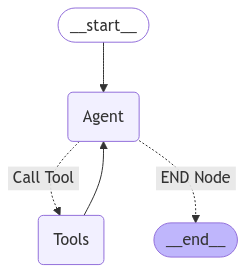

In [234]:
# 5. Display the graph
from IPython.display import Image, display

try:
    display(Image(my_graph.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

### Run graph

In [235]:
user_input = {"messages" : ["What is the current temprture in Michigan?"]}
result = my_graph.invoke(user_input)




------------ Tool Calling Func ----------
{'messages': [HumanMessage(content='What is the current temprture in Michigan?', additional_kwargs={}, response_metadata={}, id='c12ca064-0f54-4116-99da-760a5266e802')]}
Query:  [HumanMessage(content='What is the current temprture in Michigan?', additional_kwargs={}, response_metadata={}, id='c12ca064-0f54-4116-99da-760a5266e802')]
content='' additional_kwargs={'tool_calls': [{'id': 'call_zIrHGr6C4jKEzM5l6MAXepCL', 'function': {'arguments': '{"query":"current temperature in Michigan"}', 'name': 'duckduckgo_search'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 191, 'total_tokens': 212, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'too

In [236]:
result

{'messages': [HumanMessage(content='What is the current temprture in Michigan?', additional_kwargs={}, response_metadata={}, id='c12ca064-0f54-4116-99da-760a5266e802'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zIrHGr6C4jKEzM5l6MAXepCL', 'function': {'arguments': '{"query":"current temperature in Michigan"}', 'name': 'duckduckgo_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 191, 'total_tokens': 212, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-62ef46b6-a099-4b0e-833e-cd85122baf66-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'current temperature in Michigan'}, 'id': 'call_zIrHGr6C4j

In [237]:
len(result['messages'])

4

In [239]:
for message in result['messages']:
  print(message)


content='What is the current temprture in Michigan?' additional_kwargs={} response_metadata={} id='c12ca064-0f54-4116-99da-760a5266e802'
content='' additional_kwargs={'tool_calls': [{'id': 'call_zIrHGr6C4jKEzM5l6MAXepCL', 'function': {'arguments': '{"query":"current temperature in Michigan"}', 'name': 'duckduckgo_search'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 191, 'total_tokens': 212, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None} id='run-62ef46b6-a099-4b0e-833e-cd85122baf66-0' tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'current temperature in Michigan'}, 'id': 'call_zIrHGr6C4jKEzM5l6MAXepCL', 'type': 'tool_call'}] usage_met

In [240]:
result['messages'][-1].content

'The current temperature in Michigan is 15.8°F (-9°C), with the felt air temperature being 8.6°F (-13°C) due to the wind. The weather in Michigan is cloudy, and the temperature is almost at the minimum-expected for today.'

In [241]:
user_input = {"messages" : ["Who was Kobe Braynt?"]}
result = my_graph.invoke(user_input)




------------ Tool Calling Func ----------
{'messages': [HumanMessage(content='Who was Kobe Braynt?', additional_kwargs={}, response_metadata={}, id='ca2deca8-e5c4-4809-abf4-09049c4b8b47')]}
Query:  [HumanMessage(content='Who was Kobe Braynt?', additional_kwargs={}, response_metadata={}, id='ca2deca8-e5c4-4809-abf4-09049c4b8b47')]
content='' additional_kwargs={'tool_calls': [{'id': 'call_mujvgYW6kHBr007ycHNLHg0r', 'function': {'arguments': '{"query":"Kobe Bryant"}', 'name': 'wikipedia'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 187, 'total_tokens': 203, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None} id='run-b7eb1947-773b-47b4-9313-89e03f896e35

In [242]:
result['messages'][-1].content

'Kobe Bryant was an American professional basketball player who spent his entire 20-year career with the Los Angeles Lakers in the NBA. He is widely regarded as one of the greatest and most influential basketball players of all time. Bryant won five NBA championships, was an 18-time All-Star, and a two-time NBA Finals MVP. He was posthumously inducted into the Naismith Memorial Basketball Hall of Fame in 2020.\n\nBorn on August 23, 1978, in Philadelphia, Bryant was the son of NBA player Joe Bryant. He was known for his scoring prowess and leadership on the court. Bryant faced challenges in his career, including a sexual assault case in 2003, which was later settled out of court.\n\nTragically, Kobe Bryant, along with his 13-year-old daughter Gianna, and seven others, died in a helicopter crash in Calabasas, California, in January 2020. The basketball world mourned his loss, and numerous tributes were made in his honor.\n\nIf you have any more questions or need further information about

In [243]:
user_input = {"messages" : ["How do i get good at leetcode?"]}
# result = my_graph.invoke(user_input)

for output in my_graph.stream(user_input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")




------------ Tool Calling Func ----------
{'messages': [HumanMessage(content='How do i get good at leetcode?', additional_kwargs={}, response_metadata={}, id='a94e6b42-e669-4256-9598-8a6bfd1d2ff3')]}
Query:  [HumanMessage(content='How do i get good at leetcode?', additional_kwargs={}, response_metadata={}, id='a94e6b42-e669-4256-9598-8a6bfd1d2ff3')]
content='' additional_kwargs={'tool_calls': [{'id': 'call_Ny2jdB1nmxJRAfqDt4R8UgYF', 'function': {'arguments': '{"query":"LeetCode"}', 'name': 'wikipedia'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 190, 'total_tokens': 205, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None} id='run-af9b1580-f3d6-43aa-

In [244]:
print(value['messages'][0].content)

LeetCode is an online platform for coding interview preparation that provides coding and algorithmic problems for users to practice coding. To get good at LeetCode and improve your coding skills, you can follow these tips:

1. **Consistent Practice**: Practice regularly on LeetCode to improve your problem-solving skills and familiarity with different algorithms and data structures.

2. **Understand Concepts**: Focus on understanding the underlying concepts behind the problems you solve rather than just memorizing solutions.

3. **Learn Data Structures and Algorithms**: Make sure you have a good understanding of common data structures (arrays, linked lists, trees, etc.) and algorithms (sorting, searching, dynamic programming, etc.).

4. **Participate in Contests**: Engage in coding contests on platforms like LeetCode to challenge yourself and improve your speed and accuracy.

5. **Read Solutions**: After attempting a problem, read and analyze the solutions provided by others to learn ne

# Adding Message to Agent

In [283]:
from langgraph.graph import MessagesState
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

##  Tools

In [284]:
# Prebuilt Tools

from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()


from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

In [285]:
# Custom Tools

from langchain_core.tools import tool

@tool
def random_func(user_input: str) -> str:
  """
  Surprises user with a random fact.

  Args:
    user_input: string.

  Returns:
    A random fact: String.
  """
  random_prompt = "Surprise the user with something random about {user_input}".format(user_input=user_input)
  return model.predict(random_prompt)

In [286]:
tools = [search, wikipedia, random_func]

### Bind Tools

In [287]:
llm_with_tools = llm.bind_tools(tools)

### Tool Node

In [288]:
from langgraph.prebuilt import ToolNode
tool_node = ToolNode(tools)

## Agent

In [289]:
def agentic_func(state: MessagesState):
  print("------------ Tool Calling Func ----------")

  query = state['messages'] # pass the entire state as a query

  result = llm_with_tools.invoke(query)

  return {"messages" : [result]}

## Router

In [290]:
from typing import Literal

def router(state: MessagesState) -> Literal["Call Tool", "END Node"]:
  print("---------- Router ----------")

  tool_identified = state["messages"][-1]


  if tool_identified.tool_calls:
    return "Call Tool"

  return "END Node"

## Build Graph

In [291]:
from langgraph.graph import START, END, StateGraph

In [292]:
# 1. Create Instance of the Graph
workflow = StateGraph(MessagesState)


# 2. Create Nodes
workflow.add_node("Agent", agentic_func)
workflow.add_node("Tools", tool_node)


# 3. Create Conditional Edges
workflow.add_conditional_edges(
    "Agent",   # Tool Calling
    router, # The routing function
    {
        "Call Tool" : "Tools",
        "END Node" : END
    }
)

## Create Entry Point
workflow.add_edge(START, "Agent")

## Create Cyclic Edge
workflow.add_edge("Tools", "Agent")


# 4. Compile the Graph
my_graph = workflow.compile(checkpointer=memory) # add memory here

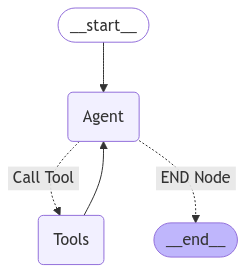

In [293]:
# 5. Display the graph
from IPython.display import Image, display

try:
    display(Image(my_graph.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

## Run graph

In [296]:
config = {"configurable": {"thread_id": "1"}}

In [297]:
user_input = "Hi there! My name is Shubham."

In [298]:
result = my_graph.invoke(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)


------------ Tool Calling Func ----------
---------- Router ----------


In [299]:
result['messages'][-1].content

'Hello Shubham! How can I assist you today?'

In [294]:
config = {"configurable": {"thread_id": "2"}}

while True:
  user_input = input("Enter your message: ")

  if user_input == "q":
    break

  result = my_graph.invoke(
    {"messages": [user_input]}, config, stream_mode="values"
  )

  print(result['messages'][-1].content)

Enter your message: Hi, I am shubham
------------ Tool Calling Func ----------
---------- Router ----------
Hello Shubham! How can I assist you today?
Enter your message: What is the current temp in MI?
------------ Tool Calling Func ----------
---------- Router ----------
------------ Tool Calling Func ----------
---------- Router ----------
The current temperature in Michigan is 15.8°F (-9°C), with a felt air temperature of 8.6°F (-13°C) due to the wind. The weather is cloudy, and the temperature is close to the minimum expected for today. If you need more detailed weather information, feel free to ask!
Enter your message: what was my name?
------------ Tool Calling Func ----------
---------- Router ----------
Your name is Shubham. How can I assist you further, Shubham?
Enter your message: what was the temperature again?
------------ Tool Calling Func ----------
---------- Router ----------
The current temperature in Michigan is 15.8°F (-9°C), with a felt air temperature of 8.6°F (-1

In [295]:
memory.get(config)

{'v': 1,
 'ts': '2025-01-06T03:24:42.718697+00:00',
 'id': '1efcbddc-51fe-6439-8011-bd68e44b31c0',
 'channel_values': {'messages': [HumanMessage(content='Hi, I am shubham', additional_kwargs={}, response_metadata={}, id='fc4ae53b-d447-4119-806e-1a9d7c19458d'),
   AIMessage(content='Hello Shubham! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 188, 'total_tokens': 202, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b63ecea7-4af0-4ad3-b83c-5265d4b5d5ec-0', usage_metadata={'input_tokens': 188, 'output_tokens': 14, 'total_tokens': 202, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0,